Compare BC and flowfm

In [1]:
import numpy as np
import os
import stompy.model.delft.dflow_model as dfm
from stompy import utils
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# 2016 runs
run_dirs=[
          'data_salt_filling-v05_existing_impaired',
          'data_2016long_3d_asbuilt_impaired-v016',
          #'data_2016long_3d_asbuilt_impaired_scen1',   
         ]

In [3]:
models=[ dfm.DFlowModel.load(run_dir) for run_dir in run_dirs]

In [4]:
modA=models[0]
modB=models[1]


In [5]:
modA.mdu.filename

'data_salt_filling-v05_existing_impaired/flowfm.mdu'

MDU Differences
==

In [6]:
!diff {modA.mdu.filename} {modB.mdu.filename}

26c26
< WaterLevIni       = 1.34032439245        # Initial water level at missing s0 values
---
> WaterLevIni       = 1.51412349214        # Initial water level at missing s0 values
49c49
< Kmx               = 100                  # Maximum number of vertical layers
---
> Kmx               = 30                   # Maximum number of vertical layers
58c58
< CFLMax                            = 0.7                 # Maximum Courant number
---
> CFLMax            = 0.4                  # Maximum Courant number
86c86
< Drop3D                            = -999.               # Apply droplosses in 3D if z upwind below bob + 2/3 hu*drop3D
---
> Drop3D            = -999                 # Apply droplosses in 3D if z upwind below bob + 2/3 hu*drop3D
144,145c144,145
< Temperature       = 1                    # Include temperature (0: no, 1: only transport, 3: excess model of D3D, 5: composite (ocean) model)
< InitialTemperature= 18                   # Uniform initial water temperature (degC)
---
> 

FlowFM.ext Differences
==

In [7]:
!diff {modA.ext_force_file()} {modB.ext_force_file()}

23,34d22
< QUANTITY=temperaturebnd
< FILENAME=butano_ck_temperature.pli
< FILETYPE=9
< METHOD=3
< OPERAND=O
< 
< QUANTITY=temperaturebnd
< FILENAME=pescadero_ck_temperature.pli
< FILETYPE=9
< METHOD=3
< OPERAND=O
< 
46,51d33
< QUANTITY=temperaturebnd
< FILENAME=ocean_bc_temperature.pli
< FILETYPE=9
< METHOD=3
< OPERAND=O
< 
62,67d43
< QUANTITY=rainfall_rate
< FILENAME=rainfall.tim
< FILETYPE=1
< METHOD=1
< OPERAND=O
< 


Structure Differences
==


In [8]:
!diff {modA.mdu.filepath(('geometry','StructureFile'))} {modB.mdu.filepath(('geometry','StructureFile'))}

2a3,51
> id           = pch_gate
> polylinefile = pch_gate.pli
> Upstream2Width = 10
> Upstream1Width = 10
> CrestWidth = 5.6548799999999995
> Downstream1Width = 10
> Downstream2Width = 10
> Upstream2Level = -0.5
> Upstream1Level = -0.5
> CrestLevel = 0.5
> Downstream1Level = -0.5
> Downstream2Level = -0.5
> GateLowerEdgeLevel = 1.7
> pos_freegateflowcoeff = 1
> pos_drowngateflowcoeff = 1
> pos_freeweirflowcoeff = 1
> pos_drownweirflowcoeff = 1
> pos_contrcoeffreegate = 1
> neg_freegateflowcoeff = 1
> neg_drowngateflowcoeff = 1
> neg_freeweirflowcoeff = 1
> neg_drownweirflowcoeff = 1
> neg_contrcoeffreegate = 1
> extraresistance = 1.0
> GateHeight = 2.0
> GateOpeningWidth = 0.0
> 
> [structure]
> type         = gate
> id           = nmc_gate
> polylinefile = nmc_gate.pli
> GateHeight = 1.0
> GateLowerEdgeLevel = 1.4
> GateOpeningWidth = 0.0
> CrestLevel = 1.2
> CrestWidth = 0.3
> 
> [structure]
> type         = gate
> id           = nm_ditch_gate
> polylinefile = nm_ditch_gate.pli
> Ga

Seepage Difference
==

Very similar

In [9]:
bcA=modA.load_bcs()
bcB=modB.load_bcs()

Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=temperaturebnd
Not implemented: reading BC quantity=temperaturebnd
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=temperaturebnd
Not implemented: reading BC quantity=discharge_salinity_temperature_sorsin
Not implemented: reading BC quantity=discharge_salinity_temperature_sorsin
Not implemented: reading BC quantity=rainfall_rate
Not implemented: reading BC quantity=windxy
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=discharge_salinity_temperature_sorsin
Not implemented: reading BC quantity=discharge_salinity_temperature_sorsin
Not implemented: reading BC quantity=windxy


In [10]:
seepA=modA.read_tim( os.path.join(modA.run_dir,"seepage.tim"))
seepB=modB.read_tim( os.path.join(modB.run_dir,"seepage.tim"))

<IPython.core.display.Javascript object>


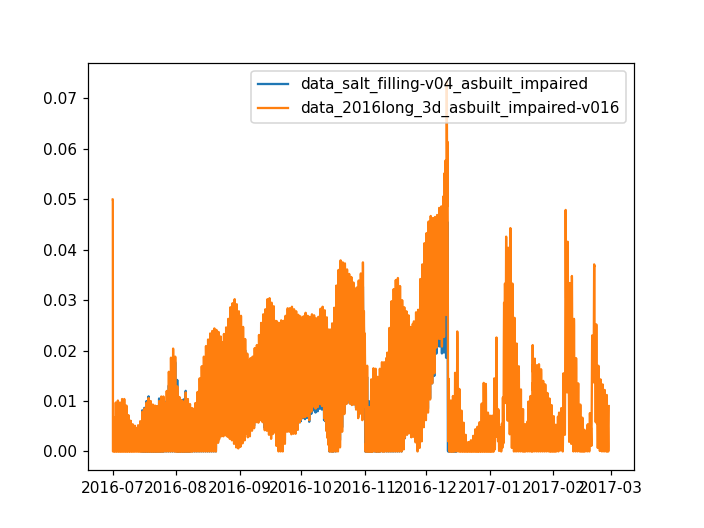

In [11]:
plt.figure()
plt.plot(seepA.time, seepA.val1,label=modA.run_dir)
plt.plot(seepB.time, seepB.val1,label=modB.run_dir)
plt.legend()

Creek Flows
==

Identical

<IPython.core.display.Javascript object>


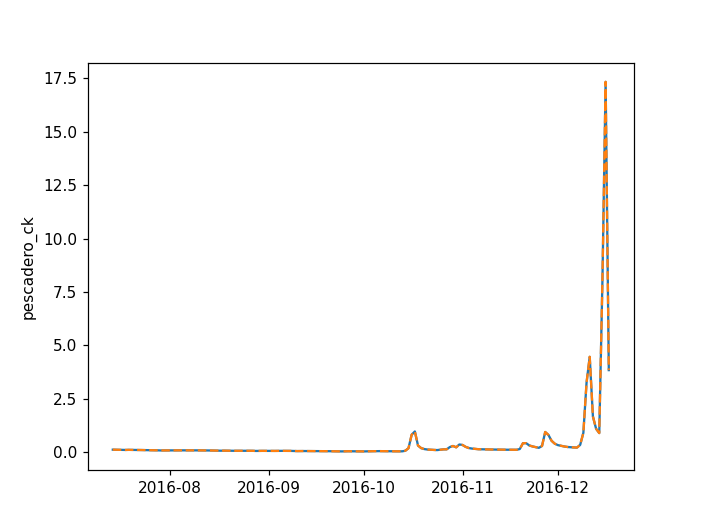

<IPython.core.display.Javascript object>


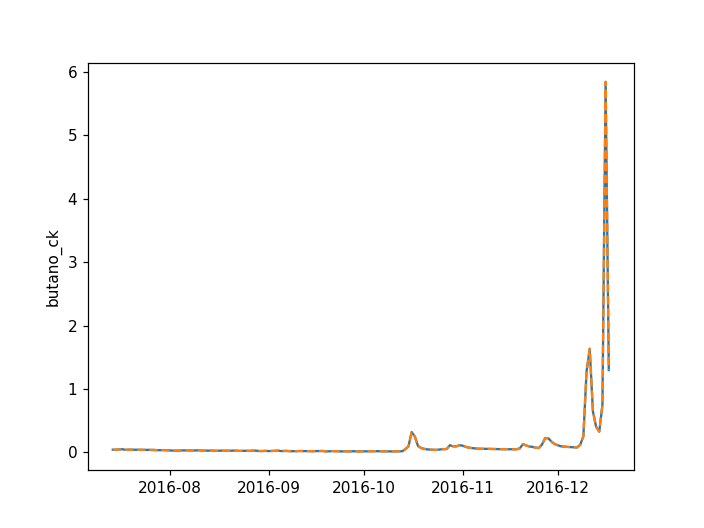

In [12]:
for name in ['pescadero_ck','butano_ck']:
    crkA=[bc for bc in bcA if bc['name']==name][0]
    crkB=[bc for bc in bcA if bc['name']==name][0]
    fig,ax=plt.subplots()
    ax.plot(crkA['data'].time,crkA['data'].flow,label='A')
    ax.plot(crkB['data'].time,crkB['data'].flow,label='B',ls='--')
    ax.set_ylabel(name)


In [6]:
mapA=modA.map_dataset()
mapB=modB.map_dataset()

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides 

INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renum

INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_